In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

# Adverse Food Events Exploration and Analysis
This notebook looks into using various Python-based machine learning and data science libraries in an attempt to explore and find any correlation to find patterns in food related adverse events.

We're going to take the following approach:

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition
What are the most commonly reported foodstuffs?
What are the most commonly reported medical reactions to foods?
Where do people in the US most commonly report food-related conditions?

## 2. Data
The data was downloaded from: https://www.kaggle.com/fda/adverse-food-events

## 3. Evaluation
TBD

## 4. Features
 1. RA_Report - The unique number that identifies each case.
 

 2. RA_CAERS Created Date - The date on which the data were first entered into CAERS from an adverse event report.


 3. AEC_Event Start Date - The reported date on which the consumer first experienced the adverse event.


 4. PRI_Product Role - Suspect or concomitant (as reported)


 5. PRI_Reported Brand/Product- Name The verbatim brands and/or product names indicated to have been used by the consumer reported to have experienced the adverse event. An adverse event report may specify consumption of a single product or multiple products.
 

 6. PRI_FDA Industry Code - The FDA industry code associated with the type of product reported.


 7. PRI_FDA Industry Name - The FDA industry description associated with the type of product reported. (Ice cream products, cosmetics, Coffee/Tea)


 8. CI_Age at Adverse Event - The age of the consumer reported to have experienced the adverse event.


 9. CI_Age Unit - The time unit (day, week, month, year) of the age provided in the CI_Age at Adverse Event data field for the consumer reported to have experienced the adverse event.


 10. CI_Gender - The sex of the individual reported to have experienced the adverse event.


 11. AEC_One Row Outcomes - Outcome(s) of the adverse event experienced by the injured consumer as specified by the reporter; each report may indicate one or more outcomes for each consumer.


 12. SYM_One Row Coded Symptoms - The symptom(s) experienced by the injured consumer as specified by the reporter and coded by FDA according to the Medical Data Dictionary for Regulatory Activities (MedDRA).

In [2]:
df = pd.read_csv('data/CAERS_ASCII_2004_2017Q2.csv')
df.head()

,RA_Report #,RA_CAERS Created Date,AEC_Event Start Date,PRI_Product Role,PRI_Reported Brand/Product Name,PRI_FDA Industry Code,PRI_FDA Industry Name,CI_Age at Adverse Event,CI_Age Unit,CI_Gender,AEC_One Row Outcomes,SYM_One Row Coded Symptoms
0,65325,1/1/2004,8/4/2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, RASH, WHEEZING, COUGH, HOSPITAL..."
1,65325,1/1/2004,8/4/2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, WHEEZING, COUGH, RASH, HOSPITAL..."
2,65333,1/1/2004,NaN,Suspect,KROGER CLASSIC CREAM-DE-MINT CANDY MINT CHIP I...,13,Ice Cream Prod,NaN,Not Available,Female,VISITED AN ER,"NAUSEA, DYSGEUSIA, DIARRHOEA"
3,65335,1/1/2004,11/24/2003,Suspect,ENFAMIL LIPIL BABY FORMULA,40,Baby Food Prod,3.0,Month(s),Not Available,NON-SERIOUS INJURIES/ ILLNESS,"GASTROINTESTINAL DISORDER, VOMITING"
4,65336,1/1/2004,NaN,Suspect,ENFIMIL LIPIL BABY FORMULA,40,Baby Food Prod,NaN,Not Available,Not Available,VISITED A HEALTH CARE PROVIDER,"GASTROINTESTINAL DISORDER, PHYSICAL EXAMINATION"


In [3]:
df.shape

(90786, 12)

In [4]:
df.info

<bound method DataFrame.info of        RA_Report # RA_CAERS Created Date AEC_Event Start Date  \
0            65325              1/1/2004             8/4/2003   
1            65325              1/1/2004             8/4/2003   
2            65333              1/1/2004                  NaN   
3            65335              1/1/2004           11/24/2003   
4            65336              1/1/2004                  NaN   
...            ...                   ...                  ...   
90781       214516             6/29/2017            1/20/2017   
90782       214516             6/29/2017            1/20/2017   
90783       214516             6/29/2017            1/20/2017   
90784       214604             6/30/2017                  NaN   
90785       214610             6/30/2017                  NaN   

      PRI_Product Role                    PRI_Reported Brand/Product Name  \
0              Suspect      MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS   
1              Suspect      MIDWE

In [5]:
df['PRI_FDA Industry Name'].value_counts()

Vit/Min/Prot/Unconv Diet(Human/Animal)     48501
Cosmetics                                  11733
Nuts/Edible Seed                            3383
Vegetables/Vegetable Products               3115
Soft Drink/Water                            2591
Bakery Prod/Dough/Mix/Icing                 2543
Fishery/Seafood Prod                        2382
Fruit/Fruit Prod                            2239
Milk/Butter/Dried Milk Prod                 1515
Dietary Conv Food/Meal Replacements         1420
Baby Food Prod                              1264
Cereal Prep/Breakfast Food                  1264
Mult Food Dinner/Grav/Sauce/Special         1016
Snack Food Item                              996
Coffee/Tea                                   872
Ice Cream Prod                               828
Choc/Cocoa Prod                              729
Candy W/O Choc/Special/Chew Gum              614
Cheese/Cheese Prod                           404
Whole Grain/Milled Grain Prod/Starch         338
Spices, Flavors And 

In [6]:
df['PRI_Reported Brand/Product Name'].value_counts().head(30)

REDACTED                                                              6081
VITAMIN D                                                              717
MULTIVITAMIN                                                           667
SUPER BETA PROSTATE                                                    648
FISH OIL                                                               622
CENTRUM SILVER WOMEN'S 50+ (MULTIMINERALS, MULTIVITAMINS) TABLET       615
CALCIUM                                                                592
VITAMIN C                                                              479
WEN CLEANSING CONDITIONER                                              372
PETER PAN CREAMY PEANUT BUTTER                                         332
HYDROXYCUT REGULAR RAPID RELEASE CAPLETS                               327
RAW OYSTERS                                                            305
MAGNESIUM                                                              303
VITAMIN D3               

<AxesSubplot:>

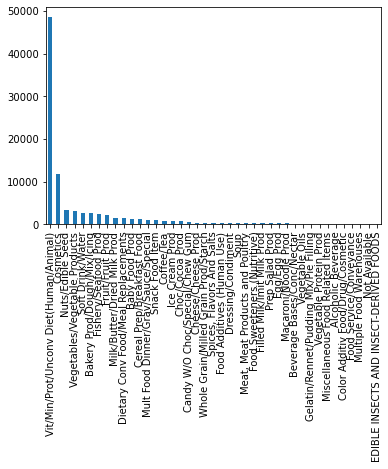

In [9]:
df['PRI_FDA Industry Name'].value_counts().plot(kind='bar')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90786 entries, 0 to 90785
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   RA_Report #                      90786 non-null  int64  
 1   RA_CAERS Created Date            90786 non-null  object 
 2   AEC_Event Start Date             53653 non-null  object 
 3   PRI_Product Role                 90786 non-null  object 
 4   PRI_Reported Brand/Product Name  90786 non-null  object 
 5   PRI_FDA Industry Code            90786 non-null  int64  
 6   PRI_FDA Industry Name            90786 non-null  object 
 7   CI_Age at Adverse Event          52926 non-null  float64
 8   CI_Age Unit                      90786 non-null  object 
 9   CI_Gender                        90786 non-null  object 
 10  AEC_One Row Outcomes             90786 non-null  object 
 11  SYM_One Row Coded Symptoms       90781 non-null  object 
dtypes: float64(1), int

In [11]:
df.isna().sum()

RA_Report #                            0
RA_CAERS Created Date                  0
AEC_Event Start Date               37133
PRI_Product Role                       0
PRI_Reported Brand/Product Name        0
PRI_FDA Industry Code                  0
PRI_FDA Industry Name                  0
CI_Age at Adverse Event            37860
CI_Age Unit                            0
CI_Gender                              0
AEC_One Row Outcomes                   0
SYM_One Row Coded Symptoms             5
dtype: int64

In [12]:
# Create a duplicate data set for data manipulation
df_tmp = df.copy()

In [13]:
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

RA_CAERS Created Date
AEC_Event Start Date
PRI_Product Role
PRI_Reported Brand/Product Name
PRI_FDA Industry Name
CI_Age Unit
CI_Gender
AEC_One Row Outcomes
SYM_One Row Coded Symptoms


In [14]:
# Convert to Category values
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [15]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90786 entries, 0 to 90785
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   RA_Report #                      90786 non-null  int64   
 1   RA_CAERS Created Date            90786 non-null  category
 2   AEC_Event Start Date             53653 non-null  category
 3   PRI_Product Role                 90786 non-null  category
 4   PRI_Reported Brand/Product Name  90786 non-null  category
 5   PRI_FDA Industry Code            90786 non-null  int64   
 6   PRI_FDA Industry Name            90786 non-null  category
 7   CI_Age at Adverse Event          52926 non-null  float64 
 8   CI_Age Unit                      90786 non-null  category
 9   CI_Gender                        90786 non-null  category
 10  AEC_One Row Outcomes             90786 non-null  category
 11  SYM_One Row Coded Symptoms       90781 non-null  category
dtypes: c

In [16]:
df_tmp.isna().sum()

RA_Report #                            0
RA_CAERS Created Date                  0
AEC_Event Start Date               37133
PRI_Product Role                       0
PRI_Reported Brand/Product Name        0
PRI_FDA Industry Code                  0
PRI_FDA Industry Name                  0
CI_Age at Adverse Event            37860
CI_Age Unit                            0
CI_Gender                              0
AEC_One Row Outcomes                   0
SYM_One Row Coded Symptoms             5
dtype: int64

In [18]:
# Find missing labels
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

RA_Report #
PRI_FDA Industry Code
CI_Age at Adverse Event


In [19]:
# Check for which numeric columns have null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

CI_Age at Adverse Event


In [20]:
df_tmp.shape

(90786, 12)

## Let's fill in the missing values

In [21]:
df_tmp.dropna(inplace=True)
df_tmp.shape
df_tmp.drop_duplicates(subset='RA_Report #', inplace=True)

(35428, 12)

In [22]:
df_tmp.isna().sum()

RA_Report #                        0
RA_CAERS Created Date              0
AEC_Event Start Date               0
PRI_Product Role                   0
PRI_Reported Brand/Product Name    0
PRI_FDA Industry Code              0
PRI_FDA Industry Name              0
CI_Age at Adverse Event            0
CI_Age Unit                        0
CI_Gender                          0
AEC_One Row Outcomes               0
SYM_One Row Coded Symptoms         0
dtype: int64

In [23]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35428 entries, 0 to 90783
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   RA_Report #                      35428 non-null  int64   
 1   RA_CAERS Created Date            35428 non-null  category
 2   AEC_Event Start Date             35428 non-null  category
 3   PRI_Product Role                 35428 non-null  category
 4   PRI_Reported Brand/Product Name  35428 non-null  category
 5   PRI_FDA Industry Code            35428 non-null  int64   
 6   PRI_FDA Industry Name            35428 non-null  category
 7   CI_Age at Adverse Event          35428 non-null  float64 
 8   CI_Age Unit                      35428 non-null  category
 9   CI_Gender                        35428 non-null  category
 10  AEC_One Row Outcomes             35428 non-null  category
 11  SYM_One Row Coded Symptoms       35428 non-null  category
dtypes: c

In [24]:
df_tmp.head().T

,0,1,3,5,16
RA_Report #,65325,65325,65335,65345,65399
RA_CAERS Created Date,1/1/2004,1/1/2004,1/1/2004,1/1/2004,1/5/2004
AEC_Event Start Date,8/4/2003,8/4/2003,11/24/2003,12/21/2003,11/22/2003
PRI_Product Role,Suspect,Suspect,Suspect,Suspect,Suspect
PRI_Reported Brand/Product Name,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,ENFAMIL LIPIL BABY FORMULA,"FRITO LAY FUNYUNS ONION FLAVOR, ONION RINGS",METOBOLITE 356
PRI_FDA Industry Code,3,3,40,7,54
PRI_FDA Industry Name,Bakery Prod/Dough/Mix/Icing,Bakery Prod/Dough/Mix/Icing,Baby Food Prod,Snack Food Item,Vit/Min/Prot/Unconv Diet(Human/Animal)
CI_Age at Adverse Event,2.0,2.0,3.0,10.0,51.0
CI_Age Unit,Year(s),Year(s),Month(s),Year(s),Year(s)
CI_Gender,Female,Female,Not Available,Male,Male


<AxesSubplot:>

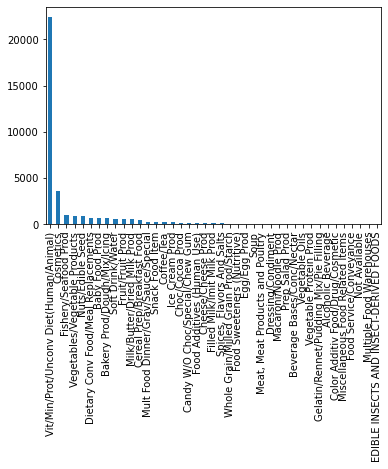

In [25]:
df_tmp['PRI_FDA Industry Name'].value_counts().plot(kind='bar')

## The data has been explored (to a certain extent). Let's take a look at how different age ranges were affected by the top product type, Vitamins

In [37]:
df_tmp['CI_Age Unit'].value_counts()

Year(s)          34227
Month(s)           928
Week(s)            135
Day(s)             128
Not Available        9
Decade(s)            1
Name: CI_Age Unit, dtype: int64

In [55]:
def convert_age(row):
    """
    normalize the age value based on the units. 
    i.e. if units in months, convert to years by dividing by 12
    
    :param row: pd.DataFrame row
    :return float - normalized age
    :rtype: float
    """
    age = row['CI_Age at Adverse Event']
    units = row['CI_Age Unit']
    
    # create lookup map
    lookup = {'Year(s)': 1.0,
             'Month(s)': 12.0,
             'Week(s)': 52.0,
             'Day(s)': 365.0,
             'Decade(s)': .1}
    
    if units != 'Not Available':
        # return the age as years
        return float(age)/lookup[units]
    
df['AgeNormed'] = df.apply(lambda row: convert_age(row), axis=1)

df = df.drop(df[df['AgeNormed'] > 105].index)